In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


In [2]:
# Carregar dados

valores_vazios = [" "]
dados = pd.read_csv("flora_volks_dados.csv", sep = ";", na_values = valores_vazios)

In [3]:
display(dados)

print(dados.info())

#print(dados.isna().any())
print(dados.isna().sum())

#dados['Número'] = pd.to_numeric(dados['Número'],errors = 'coerce')

,Número,Família,Gênero,sp,autor,Hábito,Origem,Substrato,Endemismo
0,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,Acanthaceae,Justicia,chrysotrichoma,(Nees) Benth.,"Erva, Subarbusto",Nativa,Terrícola,sim
2,138,Alstroemeriaceae,Altroemeria,stenopetala,Schenk,Erva,Nativa,Terrícola,sim
3,21,Amaranthaceae,Pfaffia,denudata,(Moq.) Kuntze,"Arbusto, Erva, Subarbusto",Nativa,Terrícola,sim
4,169,Amaranthaceae,Pfaffia,denudata,(Moq.) Kuntze,"Arbusto, Erva, Subarbusto",Nativa,Terrícola,sim
...,...,...,...,...,...,...,...,...,...
181,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Número     186 non-null    int64 
 1   Família    177 non-null    object
 2   Gênero     168 non-null    object
 3   sp         161 non-null    object
 4   autor      160 non-null    object
 5   Hábito     161 non-null    object
 6   Origem     159 non-null    object
 7   Substrato  150 non-null    object
 8   Endemismo  158 non-null    object
dtypes: int64(1), object(8)
memory usage: 13.2+ KB
None
Número        0
Família       9
Gênero       18
sp           25
autor        26
Hábito       25
Origem       27
Substrato    36
Endemismo    28
dtype: int64


In [4]:
# Retirar espaços em branco

dados['autor'] = dados['autor'].str.strip()

dados = dados.replace({" ":np.nan})


In [5]:
display(dados)

,Número,Família,Gênero,sp,autor,Hábito,Origem,Substrato,Endemismo
0,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,Acanthaceae,Justicia,chrysotrichoma,(Nees) Benth.,"Erva, Subarbusto",Nativa,Terrícola,sim
2,138,Alstroemeriaceae,Altroemeria,stenopetala,Schenk,Erva,Nativa,Terrícola,sim
3,21,Amaranthaceae,Pfaffia,denudata,(Moq.) Kuntze,"Arbusto, Erva, Subarbusto",Nativa,Terrícola,sim
4,169,Amaranthaceae,Pfaffia,denudata,(Moq.) Kuntze,"Arbusto, Erva, Subarbusto",Nativa,Terrícola,sim
...,...,...,...,...,...,...,...,...,...
181,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Excluir linhas sem dado de família
# 0 -> exclui linhas, 1 -> exclui colunas
dados_com_fam = dados.dropna(subset=['Família'], axis = 0)

In [7]:
dados_com_gen = dados.dropna(subset=['Gênero'], axis = 0)
#display(dados_com_gen)
print(dados_com_gen.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 1 to 177
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Número     168 non-null    int64 
 1   Família    168 non-null    object
 2   Gênero     168 non-null    object
 3   sp         161 non-null    object
 4   autor      160 non-null    object
 5   Hábito     156 non-null    object
 6   Origem     159 non-null    object
 7   Substrato  150 non-null    object
 8   Endemismo  158 non-null    object
dtypes: int64(1), object(8)
memory usage: 13.1+ KB
None


In [8]:
#Adicionar 'sp.' nos gêneros sem espécies
dados_com_gen["sp"] = dados_com_gen["sp"].fillna('sp.')
print(dados_com_gen.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 1 to 177
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Número     168 non-null    int64 
 1   Família    168 non-null    object
 2   Gênero     168 non-null    object
 3   sp         168 non-null    object
 4   autor      160 non-null    object
 5   Hábito     156 non-null    object
 6   Origem     159 non-null    object
 7   Substrato  150 non-null    object
 8   Endemismo  158 non-null    object
dtypes: int64(1), object(8)
memory usage: 13.1+ KB
None


C:\Users\cardi\AppData\Local\Temp\ipykernel_15516\1130625755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_com_gen["sp"] = dados_com_gen["sp"].fillna('sp.')


In [9]:
#Selecionanado linhas específicas para conferência

dados_com_gen.loc[dados_com_gen.Família == 'Amaranthaceae']

,Número,Família,Gênero,sp,autor,Hábito,Origem,Substrato,Endemismo
3,21,Amaranthaceae,Pfaffia,denudata,(Moq.) Kuntze,"Arbusto, Erva, Subarbusto",Nativa,Terrícola,sim
4,169,Amaranthaceae,Pfaffia,denudata,(Moq.) Kuntze,"Arbusto, Erva, Subarbusto",Nativa,Terrícola,sim


In [10]:
dados_agrupados = dados_com_gen.groupby(['Família','Gênero','sp'])['sp'].count().reset_index(name='counts')
display(dados_agrupados)

,Família,Gênero,sp,counts
0,Acanthaceae,Justicia,chrysotrichoma,1
1,Alstroemeriaceae,Altroemeria,stenopetala,1
2,Amaranthaceae,Pfaffia,denudata,2
3,Anacardiaceae,Tapirira,guianensis,1
4,Anemiaceae,Anemia,presliana,1
...,...,...,...,...
130,Thelypteridaceae,Christella,sp.,1
131,Urticaceae,Cecropia,pachystachya,1
132,Verbenaceae,Lippia,stachynoides var. martiana,1
133,Verbenaceae,Lippia,vernonioides,1


In [13]:
grouped_fam = dados_agrupados.groupby(["Família"])['Família'].count().reset_index(name='counts')
grouped_fam = grouped_fam.sort_values(by=['counts'], ascending=False)

grouped_fam['%'] = 100*grouped_fam['counts']/grouped_fam['counts'].sum()

#print(grouped_fam)

In [14]:
print(grouped_fam)


             Família  counts          %
9         Asteraceae      17  12.592593
19          Fabaceae      16  11.851852
25     Malpighiaceae      11   8.148148
27   Melastomataceae       7   5.185185
38         Rubiaceae       6   4.444444
34           Poaceae       5   3.703704
18     Euphorbiaceae       5   3.703704
22         Lamiaceae       4   2.962963
46       Verbenaceae       3   2.222222
14        Cyperaceae       3   2.222222
28         Myrtaceae       3   2.222222
26         Malvaceae       3   2.222222
33        Piperaceae       3   2.222222
35      Polygalaceae       3   2.222222
37       Pteridaceae       3   2.222222
10      Bignoniaceae       3   2.222222
44  Thelypteridaceae       3   2.222222
17   Erythroxylaceae       2   1.481481
39        Salicaceae       2   1.481481
11       Blechnaceae       2   1.481481
7         Araliaceae       2   1.481481
43       Styracaceae       2   1.481481
29     Nyctaginaceae       2   1.481481
30         Ochnaceae       2   1.481481


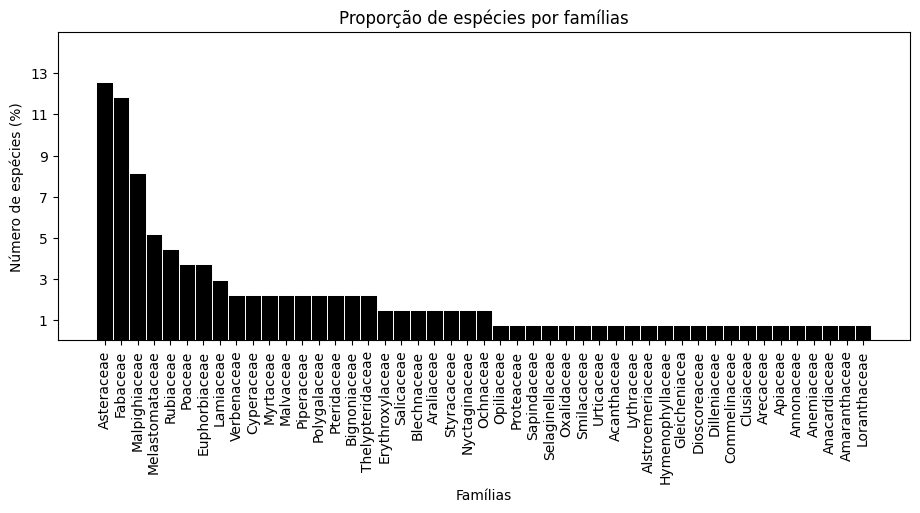

In [16]:
# Gráfico da proporção de espécies por família
fig, ax = plt.subplots()

ax.bar(grouped_fam['Família'],grouped_fam['%'], width=1, edgecolor="white", linewidth=0.7, color='black')

ax.set(ylim=(0, 15), yticks=np.arange(1,15,2))

ax.set_ylabel('Número de espécies (%)')
ax.set_xlabel('Famílias')
ax.set_title('Proporção de espécies por famílias')

fig.set_size_inches(11, 4)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, horizontalalignment='center')
plt.savefig('prop_familias', bbox_inches='tight')
plt.show()

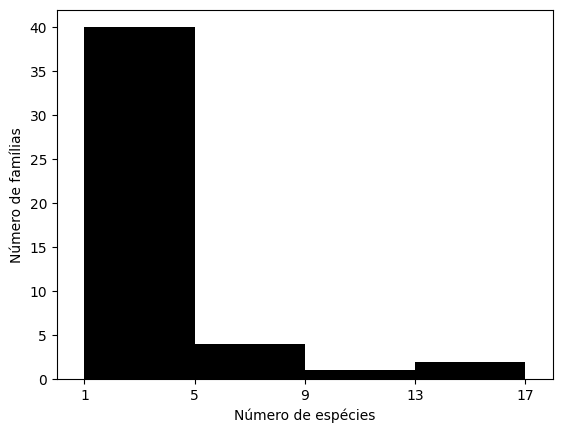

In [19]:
fig, axs = plt.subplots()

axs.set_ylabel('Número de famílias')
axs.set_xlabel('Número de espécies')

axs.set(xlim=(0, 18), xticks=np.arange(1,18,4))


# We can set the number of bins with the *bins* keyword argument.

axs.hist(grouped_fam['counts'], bins=np.arange(1, 18, 4), color='black')
plt.savefig('hist_familia', bbox_inches='tight')

In [16]:
num_esp = grouped_fam['counts'].sum()
num_fam = grouped_fam['Família'].nunique()

In [17]:
grouped_gen = dados_agrupados.groupby(["Gênero"])['Gênero'].count().reset_index(name='counts')
num_gen = grouped_gen['Gênero'].nunique()

In [18]:
print(f'Número de famílias: {num_fam}')
print(f'Número de espécies: {num_esp}')
print(f'Número de gêneros: {num_gen}')

Número de famílias: 47
Número de espécies: 135
Número de gêneros: 90


In [19]:
print(grouped_gen)

           Gênero  counts
0     Abrodictyum       1
1        Adiantum       2
2       Agonandra       1
3       Alchornea       1
4     Altroemeria       1
..            ...     ...
85     Tibouchina       1
86  Vernonanthura       1
87        Wedelia       1
88        Youngia       1
89   erythroxylum       1

[90 rows x 2 columns]


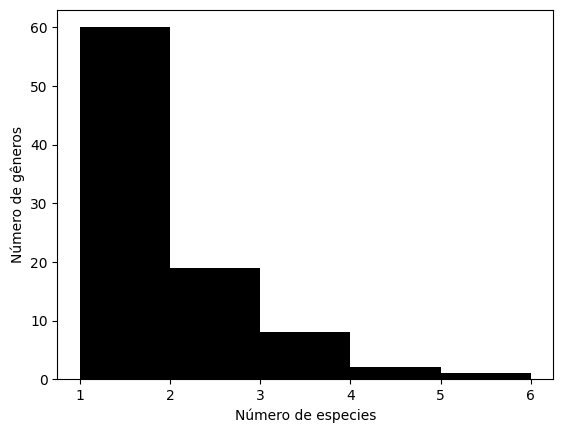

In [20]:
fig, axs = plt.subplots()

axs.set_ylabel('Número de gêneros')
axs.set_xlabel('Número de especies')

axs.hist(grouped_gen['counts'], bins=np.arange(1, 7, 1), color='black')

plt.savefig('hist_genero', bbox_inches='tight')

In [21]:
dados_agrupados2 = dados_com_gen.groupby(['Família','Gênero','sp','Hábito','Origem','Substrato','Endemismo'])['sp'].count().reset_index(name='counts')
display(dados_agrupados2)

,Família,Gênero,sp,Hábito,Origem,Substrato,Endemismo,counts
0,Acanthaceae,Justicia,chrysotrichoma,"Erva, Subarbusto",Nativa,Terrícola,sim,1
1,Alstroemeriaceae,Altroemeria,stenopetala,Erva,Nativa,Terrícola,sim,1
2,Amaranthaceae,Pfaffia,denudata,"Arbusto, Erva, Subarbusto",Nativa,Terrícola,sim,2
3,Anacardiaceae,Tapirira,guianensis,Árvore,Nativa,Terrícola,não,1
4,Annonaceae,Annona,tomentosa,"Arbusto, Subarbusto",Nativa,Terrícola,não,1
...,...,...,...,...,...,...,...,...
114,Thelypteridaceae,Christella,hispidula,Erva,Nativa,Terrícola,não,1
115,Urticaceae,Cecropia,pachystachya,Árvore,Nativa,Terrícola,não,1
116,Verbenaceae,Lippia,stachynoides var. martiana,"Arbusto, Subarbusto",Nativa,Terrícola,sim,1
117,Verbenaceae,Lippia,vernonioides,Arbusto,Nativa,Terrícola,sim,1


In [22]:
#dados_agrupados2.loc[dados_agrupados2.Família == 'Poaceae']
#print(dados_agrupados2.info())

display(dados_agrupados2['Hábito'].unique())
#print(dados_agrupados2.at[1,'Gênero'])
#print(dados_agrupados2.iloc[1,1])

array(['Erva, Subarbusto', 'Erva', 'Arbusto, Erva, Subarbusto', 'Árvore',
       'Arbusto, Subarbusto', 'Arbusto,Árvore', 'Palmeira', 'Arbusto',
       'Liana/volúvel/trepadeira', 'Subarbusto',
       'Arbusto, Árvore, Subarbusto', 'Arbusto, Árvore',
       'Arbusto, árvore', 'Arbusto, subarbusto',
       'Liana/volúvel/trepadeira, Subarbusto'], dtype=object)

In [23]:
sub = {'Erva, Subarbusto':'Subarbusto', 'Arbusto, Erva, Subarbusto':'Arbusto', 'Arbusto, Subarbusto':'Arbusto',
       'Arbusto,Árvore':'Árvore', 'Arbusto, Árvore, Subarbusto':'Árvore','Arbusto, Árvore':'Árvore','Arbusto, árvore':'Árvore',
       'Arbusto, subarbusto':'Arbusto', 'Liana/volúvel/trepadeira, Subarbusto':'Subarbusto','Liana/volúvel/trepadeira':'Liana'}
dados_agrupados2 = dados_agrupados2.replace(sub)

In [28]:
grouped_hab = dados_agrupados2.groupby(['Hábito'])['sp'].count().reset_index(name='frequência')
grouped_hab = grouped_hab.sort_values(by=['frequência'], ascending=False)
display(dados_agrupados2['Hábito'].unique())
display(grouped_hab)

array(['Subarbusto', 'Erva', 'Arbusto', 'Árvore', 'Palmeira', 'Liana'],
      dtype=object)

,Hábito,frequência
0,Arbusto,37
5,Árvore,36
1,Erva,22
4,Subarbusto,17
2,Liana,6
3,Palmeira,1


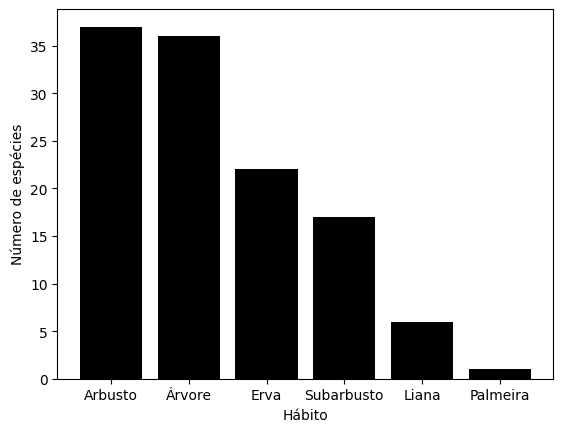

In [29]:
fig, axs = plt.subplots()

axs.set_ylabel('Número de espécies')
axs.set_xlabel('Hábito')

axs.bar(x=grouped_hab.Hábito, height=grouped_hab.frequência, color = 'black')
#axs.hist(dados_agrupados2['Hábito'], color='black')

plt.savefig('hist_habito', bbox_inches='tight')

In [30]:
display(dados_agrupados2['Substrato'].unique())

array(['Terrícola', 'Rupícola,Terrícola', 'Rupícola, Terrícola',
       'Aquática, Terrícola', 'Hemiparasita'], dtype=object)

In [31]:
sub = {'Rupícola,Terrícola':'Rupícola, Terrícola'}
dados_agrupados2 = dados_agrupados2.replace(sub)

In [32]:
grouped_subs = dados_agrupados2.groupby(['Substrato'])['sp'].count().reset_index(name='frequência')
grouped_subs = grouped_subs.sort_values(by = ['frequência'], ascending=False)
display(dados_agrupados2['Substrato'].unique())
display(grouped_subs)

array(['Terrícola', 'Rupícola, Terrícola', 'Aquática, Terrícola',
       'Hemiparasita'], dtype=object)

,Substrato,frequência
3,Terrícola,107
2,"Rupícola, Terrícola",9
0,"Aquática, Terrícola",2
1,Hemiparasita,1


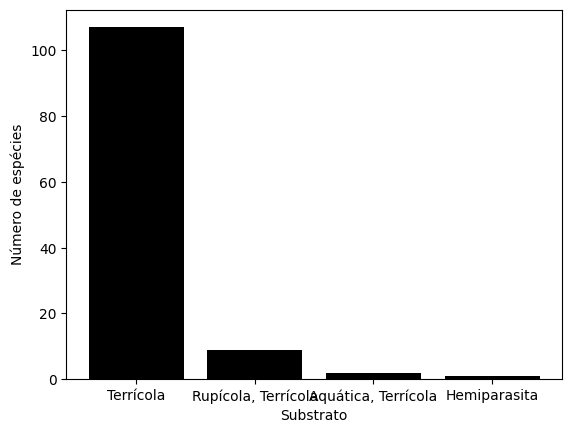

In [33]:
fig, axs = plt.subplots()

axs.set_ylabel('Número de espécies')
axs.set_xlabel('Substrato')

axs.bar(x=grouped_subs.Substrato, height=grouped_subs.frequência, color = 'black')
#axs.hist(dados_agrupados2['Hábito'], color='black')

plt.savefig('hist_substrato', bbox_inches='tight')

In [29]:
display(dados_agrupados2['Endemismo'].unique())

array(['sim', 'não', 'desconhecido'], dtype=object)

In [35]:
grouped_endem = dados_agrupados2.groupby(['Endemismo'])['sp'].count().reset_index(name='frequência')
grouped_endem = grouped_endem.sort_values(by=['frequência'], ascending=False)
display(dados_agrupados2['Endemismo'].unique())
display(grouped_endem)

array(['sim', 'não', 'desconhecido'], dtype=object)

,Endemismo,frequência
1,não,67
2,sim,49
0,desconhecido,3


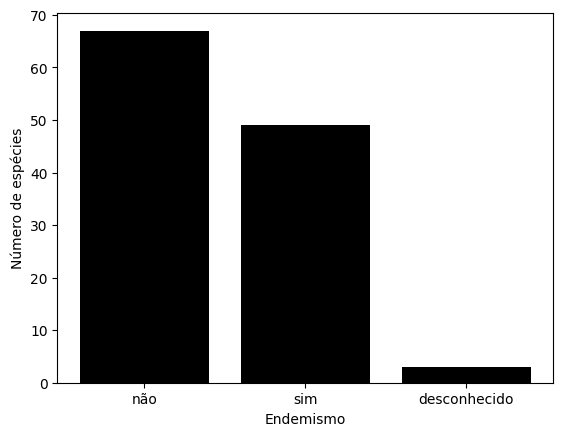

In [36]:
fig, axs = plt.subplots()

axs.set_ylabel('Número de espécies')
axs.set_xlabel('Endemismo')

axs.bar(x=grouped_endem.Endemismo, height=grouped_endem.frequência, color = 'black')
#axs.hist(dados_agrupados2['Hábito'], color='black')

plt.savefig('hist_endemismo', bbox_inches='tight')

In [32]:
display(dados_agrupados2['Origem'].unique())

array(['Nativa', 'Naturalizada'], dtype=object)

In [33]:
grouped_orig = dados_agrupados2.groupby(['Origem'])['sp'].count().reset_index(name='frequência')
display(grouped_orig)

,Origem,frequência
0,Nativa,116
1,Naturalizada,3


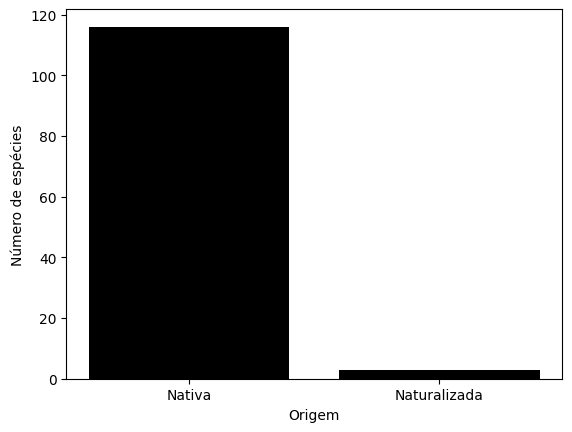

In [34]:
fig, axs = plt.subplots()

axs.set_ylabel('Número de espécies')
axs.set_xlabel('Origem')

axs.bar(x=grouped_orig.Origem, height=grouped_orig.frequência, color = 'black')
#axs.hist(dados_agrupados2['Hábito'], color='black')

plt.savefig('hist_origem', bbox_inches='tight')